# Supervised Classification on Codon Usage Dataset

#### Classifier : Support Vector Machine

### Abstract: 
DNA codon usage frequencies of a large sample of diverse biological organisms from different taxa

### Attribute Information:

- Column 1: Kingdom 
- Column 2: DNAtype 
- Column 3: SpeciesID 
- Column 4: Ncodons 
- Column 5: SpeciesName 
- Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number)) 

## Problem Statement :

### Classifying different species into their Kingdom types on the basis of codon frequency usage as input features with Genomic DNA type.

#### Class labels: 
1. Virus 
2. Bacteria 
3. Plants
4. Vertebrates
5. Invertebrates

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_fscore_support, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from collections import defaultdict
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

## Reading dataset

In [2]:
data_dir = Path('../data')
data_path = data_dir / 'codon_usage_dataset_processed.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Kingdom,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [4]:
df.shape

(8657, 68)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8657 entries, 0 to 8656
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      8657 non-null   object 
 1   SpeciesID    8657 non-null   int64  
 2   Ncodons      8657 non-null   int64  
 3   SpeciesName  8657 non-null   object 
 4   UUU          8657 non-null   float64
 5   UUC          8657 non-null   float64
 6   UUA          8657 non-null   float64
 7   UUG          8657 non-null   float64
 8   CUU          8657 non-null   float64
 9   CUC          8657 non-null   float64
 10  CUA          8657 non-null   float64
 11  CUG          8657 non-null   float64
 12  AUU          8657 non-null   float64
 13  AUC          8657 non-null   float64
 14  AUA          8657 non-null   float64
 15  AUG          8657 non-null   float64
 16  GUU          8657 non-null   float64
 17  GUC          8657 non-null   float64
 18  GUA          8657 non-null   float64
 19  GUG   

### Label Encoding

In [6]:
label_encoder = LabelEncoder()
labels_enc = label_encoder.fit_transform(df['Kingdom'])

df['Kingdom'] = labels_enc
labels_enc

array([3, 3, 3, ..., 4, 4, 4])

In [7]:
df.head()

,Kingdom,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,3,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,3,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,3,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,3,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [8]:
features = df.drop(columns=['Kingdom','SpeciesID','SpeciesName', 'Ncodons'])
features.head()

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [9]:
labels = df['Kingdom']
labels

0       3
1       3
2       3
3       3
4       3
       ..
8652    4
8653    4
8654    4
8655    4
8656    4
Name: Kingdom, Length: 8657, dtype: int64

## Modelling using All the features

### Splitting dataset into training and testing sets using Stratified strategy (70-30 split)

In [10]:
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.3,
                                                                            shuffle=True,
                                                                            stratify=labels,
                                                                            random_state=42)

In [11]:
print('====================')
print(' Train-Test Split')
print('====================')
print('')
print('Overall class ratio:')
print('{}'.format(labels.value_counts() / len(labels)))
print(' ')
print('Train set class ratio:')
print('{}'.format(train_labels.value_counts() / len(train_labels)))
print(' ')
print('Test set class ratio:')
print('{}'.format(test_labels.value_counts() / len(test_labels)))

 Train-Test Split

Overall class ratio:
0    0.336953
3    0.327019
2    0.175927
1    0.106503
4    0.053598
Name: Kingdom, dtype: float64
 
Train set class ratio:
0    0.337019
3    0.326952
2    0.175937
1    0.106453
4    0.053639
Name: Kingdom, dtype: float64
 
Test set class ratio:
0    0.336798
3    0.327175
2    0.175905
1    0.106620
4    0.053503
Name: Kingdom, dtype: float64


In [12]:
print(f'Train Features: {train_features.shape}')
print(f'Train Labels: {train_labels.shape}')
print(f'Test Features: {test_features.shape}') 
print(f'Test Labels: {test_labels.shape}')

Train Features: (6059, 64)
Train Labels: (6059,)
Test Features: (2598, 64)
Test Labels: (2598,)


## Data Scaling

In [13]:
sc = StandardScaler()

train_features_scaled = sc.fit_transform(train_features)
train_features_scaled

array([[-0.07604553,  1.41233573, -0.21268344, ..., -0.77664077,
         0.36092729,  0.6792895 ],
       [ 0.99984058, -0.03411302, -0.10911732, ...,  0.21465786,
         1.36012081, -0.35203926],
       [-0.43377767, -0.53136431,  0.40577522, ..., -0.51191898,
        -0.70879754, -0.05857173],
       ...,
       [-1.23889911,  0.49297335, -0.95527453, ..., -0.51755136,
        -0.20332317,  0.83021566],
       [-0.23563531,  1.40791572, -0.1590641 , ...,  0.31040829,
        -0.55597971, -0.34365448],
       [-1.32317686,  0.93165949, -0.95527453, ...,  0.03442174,
         0.87815688, -0.49458064]])

In [14]:
test_features_scaled = sc.transform(test_features)
test_features_scaled

array([[ 0.84831996, -0.18770842,  1.21741039, ...,  1.44251639,
        -0.47369318, -0.18434353],
       [ 1.51895564, -0.5258393 ,  0.30588166, ..., -0.24156481,
         0.40794816, -0.84674168],
       [ 1.30467498, -1.184421  ,  2.02390398, ...,  0.51317392,
         0.54901078, -0.56165893],
       ...,
       [ 0.40182722, -1.04961065, -0.05329445, ..., -0.28662383,
        -0.19156795, -0.11726523],
       [ 1.11191205,  0.84988927,  0.66211972, ..., -0.77664077,
        -0.70879754, -0.05018694],
       [-0.05452781,  0.49186834, -0.67983273, ...,  0.50190917,
        -0.03875012,  0.82183088]])

## Model Building

In [15]:
parameters = {
    'kernel': ('poly', 'rbf', 'sigmoid', 'linear'),
    'C': [0.1, 1, 10],
    'gamma':('scale', 'auto'),
    'degree': [3,4,5]}

In [16]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
grid_cv = GridSearchCV(estimator = svm,
                      param_grid=parameters,
                      cv=10,
                      n_jobs=-1,
                      scoring='f1_micro')

In [17]:
grid_cv.fit(train_features_scaled, train_labels)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 4, 5],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid', 'linear')},
             scoring='f1_micro')

In [18]:
grid_cv.cv_results_

{'mean_fit_time': array([1.78144665, 1.67631459, 1.64399185, 0.57816563, 1.93649371,
        1.68809144, 1.60439174, 0.56181583, 2.18694398, 1.68836944,
        1.61607466, 0.56453965, 2.22478473, 1.67527061, 1.65806112,
        0.61827726, 2.35773914, 1.7953764 , 1.63128381, 0.5895395 ,
        2.29377949, 1.71290886, 1.66671181, 0.60069392, 1.42550623,
        0.97057531, 0.97957273, 1.25768342, 1.36869197, 0.98887887,
        0.95089312, 1.23211052, 1.87045102, 1.04012532, 0.96145015,
        1.2468987 , 1.84798782, 0.97821069, 0.93297834, 1.26409049,
        1.97464004, 1.00055313, 1.02769339, 1.2624696 , 2.04525225,
        1.03108654, 0.96915729, 1.30313795, 0.95784609, 0.93516002,
        0.87126243, 7.87149031, 0.90377777, 0.88253787, 0.77857554,
        8.04388354, 1.36691778, 0.88183868, 0.82672968, 8.1430047 ,
        1.47257934, 0.95458653, 0.78684561, 8.01110013, 1.50959437,
        0.87680714, 0.79431896, 8.37860546, 1.72153103, 1.00182686,
        0.9159308 , 7.4603879 ]

In [19]:
grid_cv.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

In [20]:
predict_labels = grid_cv.predict(test_features_scaled)
predict_labels

array([0, 1, 0, ..., 2, 2, 3])

## Model Evaluation

In [21]:
metric_arr = defaultdict(list)

def evaluate(model,X_train,X_test,y_train,y_test, y_pred):
    print()
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    metric_arr['precision'].append( str(precision))
    metric_arr['recall'].append(str(recall))
    metric_arr['fscore'].append(str(fscore))
    metric_arr['support'].append(str(support))
    cnf_matrix = confusion_matrix(y_test, y_pred)

# https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    metric_arr['sensitivity'].append(TPR)
    metric_arr['specificity'].append(TNR)

    acc = model.score(X_test,y_test)*100
    metric_arr['accuracy'].append(acc)
    print(55*'-')
    print('Accuracy')
    print(55*'-')
    print(acc)
    print(55*'-')

    auc = roc_auc_score(test_labels, predict_labels, multi_class='ovo', average='weighted')
    metric_arr['auc'].append(auc)

In [22]:
#evaluate(grid_cv, train_features_scaled, test_features_scaled, train_labels, test_labels, predict_labels)

In [23]:
#metric_arr

In [24]:
svm_train_acc = grid_cv.score(train_features_scaled, train_labels)
print(f"Support Vector Machine Accuracy (Training): {svm_train_acc:.4}")

svm_test_acc = grid_cv.score(test_features_scaled, test_labels)
print(f"Support Vector Machine Accuracy (Testing): {svm_test_acc:.4}")

Support Vector Machine Accuracy (Training): 0.9995
Support Vector Machine Accuracy (Testing): 0.9554


In [25]:
print(55 * "=")
print("Support Vector Machines")
print(55 * "-")
print(classification_report(test_labels, predict_labels))
print(55 * "=")

Support Vector Machines
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       875
           1       0.90      0.83      0.86       277
           2       0.94      0.94      0.94       457
           3       0.97      0.98      0.97       850
           4       0.95      0.91      0.93       139

    accuracy                           0.96      2598
   macro avg       0.95      0.93      0.94      2598
weighted avg       0.95      0.96      0.95      2598



- 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.

- 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

- In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance.

- We chose f1_micro as our scoring strategy since it works better for multiclass problem when the classes are imbalanced.

In [26]:
scores = cross_val_score(svm, 
                         train_features_scaled, 
                         train_labels, 
                         scoring='f1_micro', 
                         cv=10)

# Display scores
def display_scores(scores):
    print(55*'-')
    print(f"Scores:")
    for score in scores:
        print(f"\t{score:.2}")
    print(55*'-')
    print(f"Mean: {scores.mean():.2}")
    print(55*'-')
    print(f"Standard Deviation: {scores.std():.2}")
    print(55*'-')

display_scores(scores)

-------------------------------------------------------
Scores:
	0.94
	0.95
	0.96
	0.97
	0.95
	0.96
	0.95
	0.95
	0.94
	0.94
-------------------------------------------------------
Mean: 0.95
-------------------------------------------------------
Standard Deviation: 0.01
-------------------------------------------------------


Support Vector Machine


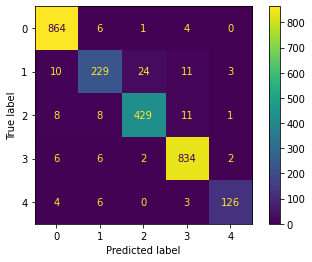

In [46]:
print('Support Vector Machine')
plot_confusion_matrix(grid_cv, test_features_scaled, test_labels)
plt.show()

### Detecting Outliers

In [28]:
predictions = test_features.merge(test_labels.to_frame(), left_index=True, right_index=True)
predictions['Predicted']= predict_labels
predictions['iscorrect'] = predictions.apply(lambda x : 'Yes' if x['Kingdom'] == x['Predicted'] else "No", axis=1)

In [29]:
predictions

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom,Predicted,iscorrect
4310,0.02938,0.01913,0.03037,0.01716,0.01854,0.00769,0.01558,0.01124,0.02721,0.02071,...,0.03589,0.01282,0.04437,0.01854,0.00394,0.00020,0.00079,0,0,Yes
8005,0.03686,0.01607,0.01796,0.03403,0.01040,0.00756,0.00756,0.00662,0.03214,0.02457,...,0.03025,0.01796,0.03970,0.01796,0.00095,0.00095,0.00000,1,1,Yes
5472,0.03447,0.01011,0.04135,0.01108,0.01787,0.00671,0.00803,0.00403,0.04201,0.01726,...,0.04018,0.01304,0.05285,0.01882,0.00229,0.00107,0.00034,0,0,Yes
7820,0.01555,0.02247,0.00403,0.01210,0.01440,0.01382,0.00806,0.01555,0.02131,0.01901,...,0.02650,0.02304,0.03399,0.01613,0.00173,0.00115,0.00346,1,1,Yes
2869,0.01945,0.01531,0.00944,0.01705,0.01300,0.00751,0.00626,0.02003,0.02254,0.03034,...,0.02668,0.03843,0.03602,0.01878,0.00212,0.00154,0.00125,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,0.00143,0.02292,0.00000,0.00215,0.00143,0.04083,0.00143,0.01433,0.00430,0.04441,...,0.01648,0.08811,0.03797,0.10888,0.00143,0.00000,0.00072,0,0,Yes
2014,0.01904,0.02629,0.01904,0.00907,0.00907,0.01088,0.01360,0.00725,0.02448,0.01995,...,0.03536,0.01451,0.02629,0.02085,0.00363,0.00000,0.00181,3,3,Yes
5873,0.02440,0.01133,0.01307,0.03094,0.02353,0.00959,0.01002,0.02048,0.02702,0.01917,...,0.03268,0.01917,0.02527,0.03268,0.00087,0.00044,0.00087,2,2,Yes
6003,0.03232,0.02852,0.02281,0.03327,0.04183,0.02567,0.01236,0.02376,0.02376,0.01521,...,0.02662,0.01521,0.01426,0.02471,0.00000,0.00000,0.00095,2,2,Yes


In [30]:
features_stats = features.describe()
features_stats

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,...,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000,8657.000000
mean,0.019945,0.020836,0.013814,0.015684,0.014446,0.015746,0.007800,0.021774,0.022131,0.021900,...,0.006725,0.011355,0.008121,0.028814,0.025561,0.030758,0.027695,0.001377,0.000598,0.001013
std,0.011201,0.009112,0.013628,0.007658,0.007225,0.010625,0.005028,0.017619,0.012348,0.010294,...,0.007331,0.008183,0.006202,0.011944,0.012523,0.014711,0.012830,0.001719,0.000811,0.001250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012010,0.014420,0.003270,0.010350,0.009450,0.008200,0.003880,0.009030,0.013640,0.014740,...,0.002020,0.004330,0.003140,0.020900,0.016790,0.020780,0.018640,0.000480,0.000000,0.000230
50%,0.019250,0.020440,0.010160,0.015160,0.013850,0.013660,0.007580,0.015940,0.021220,0.020340,...,0.004620,0.010860,0.006710,0.029340,0.023000,0.029160,0.026020,0.001060,0.000450,0.000760
75%,0.027030,0.026370,0.019300,0.020200,0.018780,0.021180,0.010890,0.030220,0.029050,0.028260,...,0.008470,0.016490,0.012100,0.036750,0.032110,0.038920,0.034940,0.001910,0.000820,0.001450
max,0.086600,0.074240,0.090440,0.061860,0.051680,0.096260,0.035180,0.107370,0.086540,0.082030,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.014200,0.033150


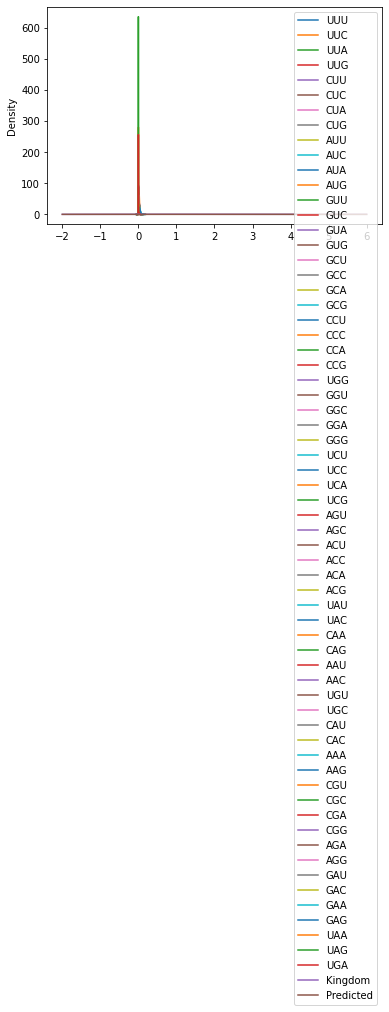

In [31]:
skip = set(['Kingdom', 'Predicted', 'iscorrect','outlier'])

def detect_outlier(row):
    res = []
    for c in predictions.columns:
        if c in skip: continue
        res.append(abs((row[c] - features_stats[c]['mean']) / features_stats[c]['std']) > 3)
    # limit = features_stats[c]['mean'] +   6 * features_stats[c]['std']
    # res.append( abs(row[c]) > limit )
    if any(res):
        return True
    else:
        return False


inc_predictions = predictions[predictions['iscorrect'] == 'No']
inc_predictions['outlier'] = inc_predictions.apply(lambda x : detect_outlier(x), axis=1)
inc_predictions.plot.kde()
plt.show()

In [32]:
inc_predictions

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom,Predicted,iscorrect,outlier
5236,0.01176,0.02868,0.00735,0.01838,0.01103,0.01176,0.00809,0.02353,0.00882,0.02132,...,0.04706,0.02059,0.03824,0.00000,0.00221,0.00074,0,2,No,False
7962,0.01675,0.02400,0.00347,0.03794,0.00926,0.01583,0.00527,0.01716,0.02997,0.03008,...,0.02626,0.02286,0.03925,0.00194,0.00000,0.00014,1,2,No,False
2865,0.01482,0.02790,0.01308,0.01395,0.02354,0.02441,0.01133,0.01308,0.01656,0.02616,...,0.02267,0.01918,0.02441,0.00262,0.00087,0.00000,0,3,No,True
7546,0.00201,0.03137,0.00000,0.00100,0.01455,0.03488,0.00000,0.02936,0.02183,0.03689,...,0.03036,0.00402,0.06524,0.00176,0.00025,0.00025,1,2,No,True
7676,0.00379,0.02720,0.00103,0.00723,0.01860,0.02686,0.00069,0.04304,0.00482,0.03616,...,0.04132,0.01446,0.06129,0.00103,0.00069,0.00000,1,2,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,0.01611,0.01134,0.01611,0.00477,0.00955,0.01790,0.01611,0.01372,0.01432,0.01432,...,0.01492,0.02506,0.03103,0.00060,0.00000,0.00179,1,3,No,False
6776,0.00747,0.02483,0.00330,0.01354,0.01059,0.01980,0.00660,0.02969,0.01580,0.03195,...,0.04410,0.01563,0.03785,0.00191,0.00052,0.00017,2,1,No,True
524,0.02686,0.01410,0.02865,0.00963,0.01813,0.00493,0.01343,0.00716,0.02888,0.01388,...,0.01836,0.06403,0.01030,0.00403,0.00112,0.00269,3,0,No,False
7617,0.02060,0.02525,0.01262,0.00797,0.02060,0.00864,0.01130,0.00598,0.02525,0.02126,...,0.02126,0.02525,0.01462,0.00133,0.00000,0.00066,1,2,No,True


## Modelling using only important features detected using Data Plotting and Visualisation

In [33]:
selected_codon_frequencies = ['AGA','AGG','CCG','CUG','GGC','GGG','GCA','UGG','GUA','UAG','CAC','AUU','AUG']

In [34]:
train_sel_features, test_sel_features, train_sel_labels, test_sel_labels = train_test_split(features[selected_codon_frequencies], 
                                                                            labels, 
                                                                            test_size=0.3,
                                                                            shuffle=True,
                                                                            stratify=labels,
                                                                            random_state=42)

In [35]:
sc = StandardScaler()

train_sel_features_scaled = sc.fit_transform(train_sel_features)
train_sel_features_scaled

array([[-0.72317669,  0.58599806, -0.11716638, ...,  0.17890601,
        -0.61310045,  0.9409479 ],
       [ 0.24875538, -0.26976955, -0.72822233, ..., -1.42620821,
         0.11071258, -1.8746981 ],
       [ 1.41192687,  0.88296219, -0.957498  , ..., -0.05226979,
         0.31114063, -0.1930246 ],
       ...,
       [-1.30415725, -0.99621406,  1.71911381, ...,  1.33806408,
        -1.40750959, -0.36119195],
       [ 0.66875591,  0.25071597, -0.29145738, ...,  0.5346872 ,
         0.03687067,  1.23099801],
       [-1.23153468, -0.99621406,  0.82172264, ..., -0.18507291,
        -1.0983473 ,  0.4086751 ]])

In [36]:
test_sel_features_scaled = sc.transform(test_sel_features)
test_sel_features_scaled

array([[-0.28502051, -0.73277814, -0.43773733, ..., -0.09653749,
         0.41581762, -0.85335144],
       [ 0.10472061, -0.39430289,  0.21896626, ..., -0.20146835,
         0.81586227, -0.03719981],
       [-0.09136033, -1.08881578, -0.58609217, ..., -0.70152947,
         1.61676301, -0.72992586],
       ...,
       [-0.0114755 ,  1.13522204, -0.0684064 , ..., -0.83433259,
         0.40040008,  0.82060796],
       [-0.23176396,  0.5221348 , -0.85790314, ..., -0.66054086,
         0.13586752, -1.18968614],
       [ 0.02604616,  0.87657586,  0.20132967, ...,  1.12000464,
        -0.11000171,  0.12942473]])

In [37]:
svm = SVC()
grid_cvv = GridSearchCV(estimator = svm,
                      param_grid=parameters,
                      cv=10)

grid_cvv.fit(train_sel_features_scaled, train_sel_labels)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 4, 5],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid', 'linear')})

In [38]:
predict_sel_labels = grid_cvv.predict(test_sel_features_scaled)
predict_sel_labels

array([0, 3, 0, ..., 2, 2, 3])

In [39]:
svm_train_acc = grid_cvv.score(train_sel_features_scaled, train_sel_labels)
print(f"Support Vector Machine Accuracy (Training): {svm_train_acc:.4}")

svm_test_acc = grid_cvv.score(test_sel_features_scaled, test_sel_labels)
print(f"Support Vector Machine Accuracy (Testing): {svm_test_acc:.4}")

Support Vector Machine Accuracy (Training): 0.9089
Support Vector Machine Accuracy (Testing): 0.8337


In [40]:
print(55 * "=")
print("Support Vector Machines")
print(55 * "-")
print(classification_report(test_sel_labels, predict_sel_labels))
print(55 * "=")

Support Vector Machines
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       875
           1       0.68      0.58      0.63       277
           2       0.72      0.74      0.73       457
           3       0.84      0.86      0.85       850
           4       0.86      0.82      0.84       139

    accuracy                           0.83      2598
   macro avg       0.80      0.79      0.80      2598
weighted avg       0.83      0.83      0.83      2598



SVM on selected features


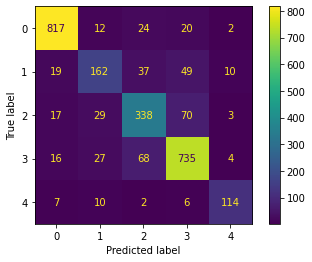

In [50]:
print('SVM on selected features')
plot_confusion_matrix(grid_cvv, test_sel_features_scaled, test_sel_labels)
plt.show()

In [42]:
scores = cross_val_score(svm, 
                         train_sel_features_scaled, 
                         train_sel_labels, 
                         scoring='f1_micro', 
                         cv=10)

# Display scores
def display_scores(scores):
    print(55*'-')
    print(f"Scores:")
    for score in scores:
        print(f"\t{score:.2}")
    print(55*'-')
    print(f"Mean: {scores.mean():.2}")
    print(55*'-')
    print(f"Standard Deviation: {scores.std():.2}")
    print(55*'-')

display_scores(scores)

-------------------------------------------------------
Scores:
	0.79
	0.79
	0.81
	0.82
	0.8
	0.81
	0.8
	0.79
	0.8
	0.8
-------------------------------------------------------
Mean: 0.8
-------------------------------------------------------
Standard Deviation: 0.011
-------------------------------------------------------
